# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

# Import libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from kneed import KneeLocator
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

In [198]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# 1. Data Cleaning, Transformation

In [199]:
df = df.drop(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date'], axis=1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,Female,O-,Diabetes,Aspirin,Inconclusive
1,35,Male,O+,Asthma,Lipitor,Normal
2,61,Male,B-,Obesity,Lipitor,Normal
3,49,Male,B-,Asthma,Penicillin,Abnormal
4,51,Male,O-,Arthritis,Paracetamol,Normal


In [200]:
df_null = df.isna().sum()
df_null

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Medication           0
Test Results         0
dtype: int64

In [201]:
le = LabelEncoder()
category = ['Gender', 'Blood Type', 'Medical Condition','Medication', 'Test Results']
new_df = df.copy()

for col in category:
    new_df[col] = le.fit_transform(new_df[col])

new_df.head()


,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,7,3,0,1
1,35,1,6,1,2,2
2,61,1,5,5,2,2
3,49,1,5,1,4,0
4,51,1,7,0,3,2


In [202]:
new_df.describe()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,51.452200,0.492500,3.501100,2.487500,2.02080,0.981100
std,19.588974,0.499969,2.286071,1.701803,1.41858,0.819762
min,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,0.000000,2.000000,1.000000,1.00000,0.000000
50%,52.000000,0.000000,3.000000,2.000000,2.00000,1.000000
75%,68.000000,1.000000,5.000000,4.000000,3.00000,2.000000
max,85.000000,1.000000,7.000000,5.000000,4.00000,2.000000


# 2. Visualization (EDA)

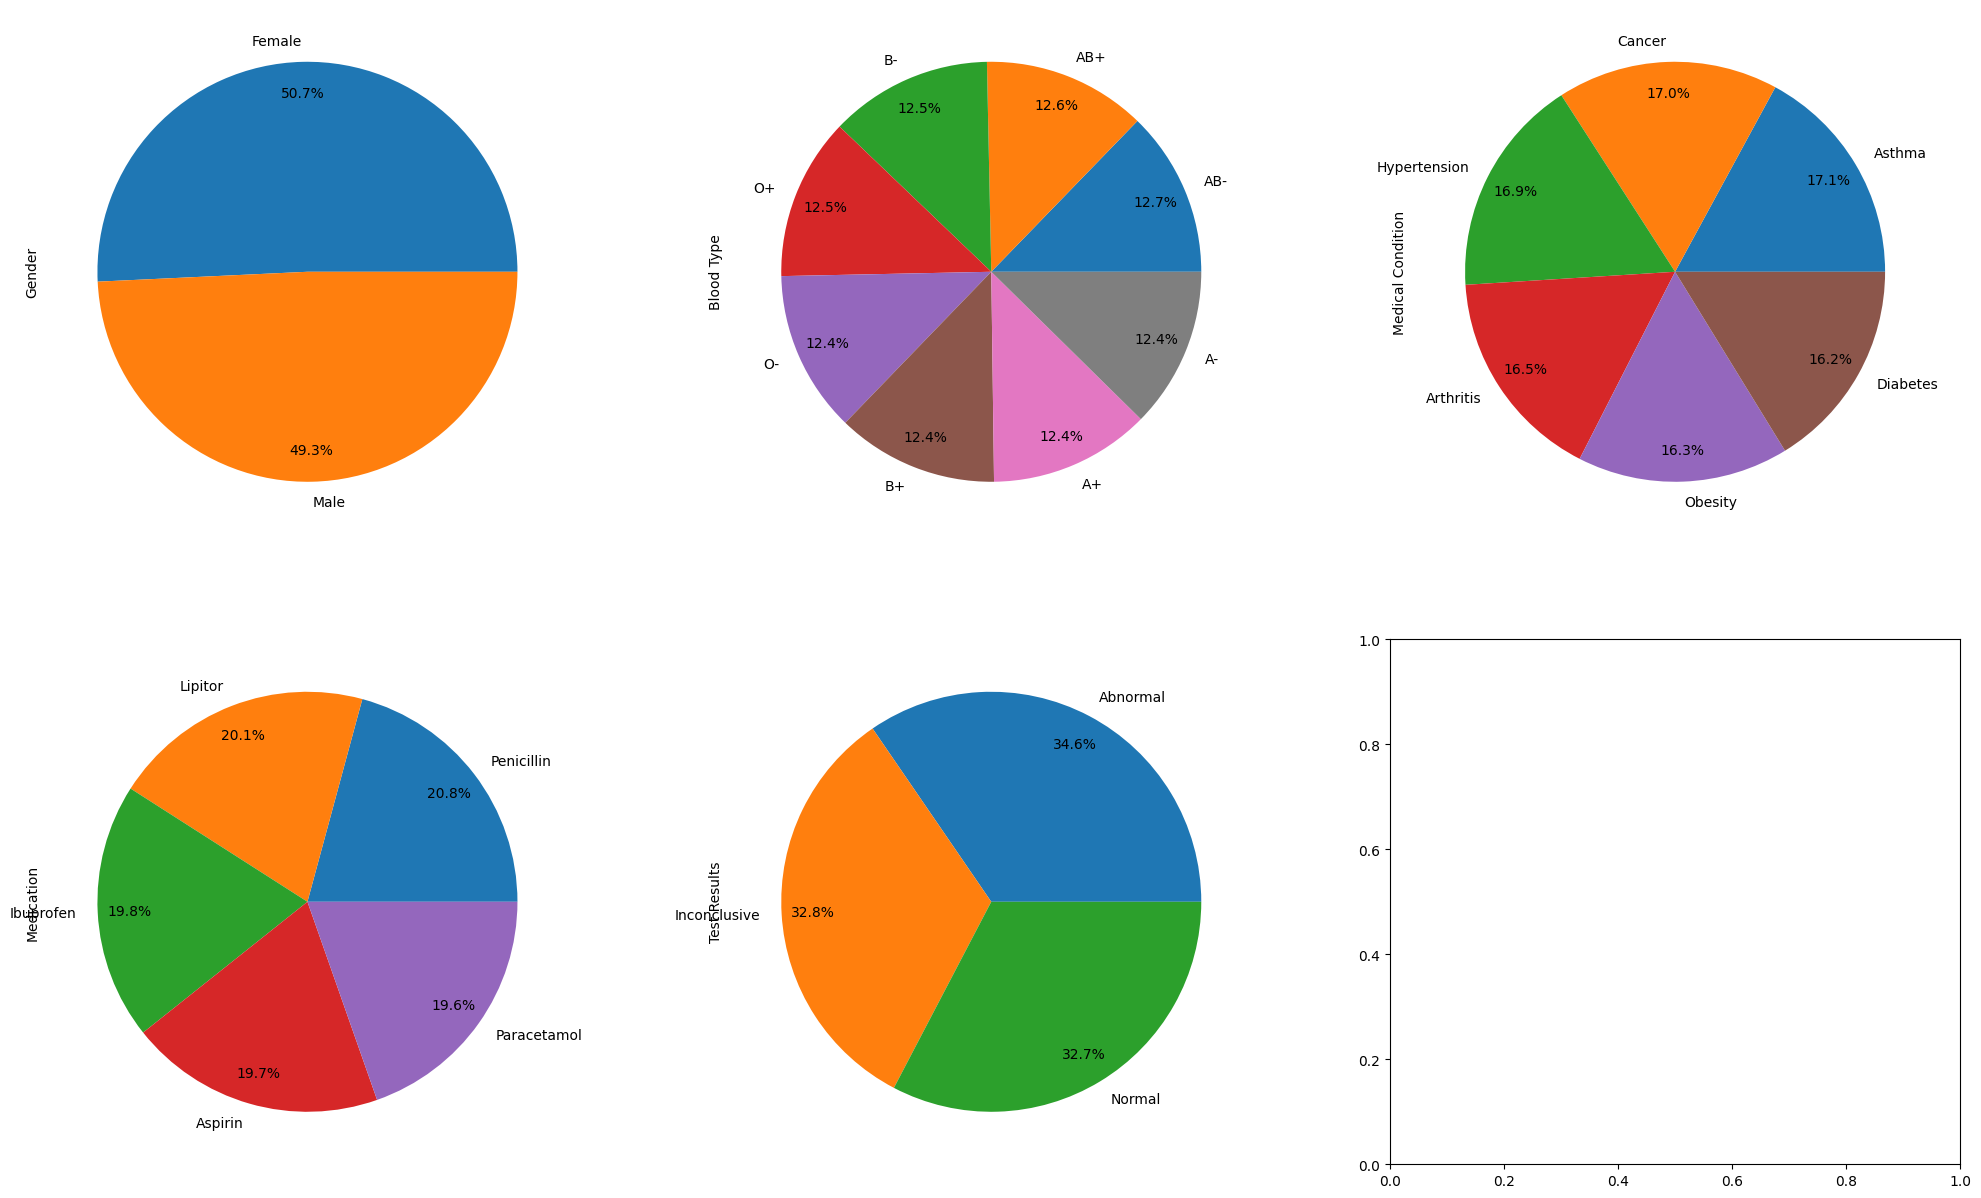

In [203]:
columns = ['Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Test Results']
fig, axis = plt.subplots((len(columns) + 2) // 3, 3, figsize=(25, 15))
for i, col_name in enumerate(columns):
    df[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85, ax=axis[i // 3, i % 3])
    axis[i // 3, i % 3].set_title(col_name)
    axis[i // 3, i % 3].set_title('')

plt.show()

#  Clustering method

In [204]:
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, 1].values

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

In [206]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [207]:
dfs = scaler.fit_transform(new_df)

/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

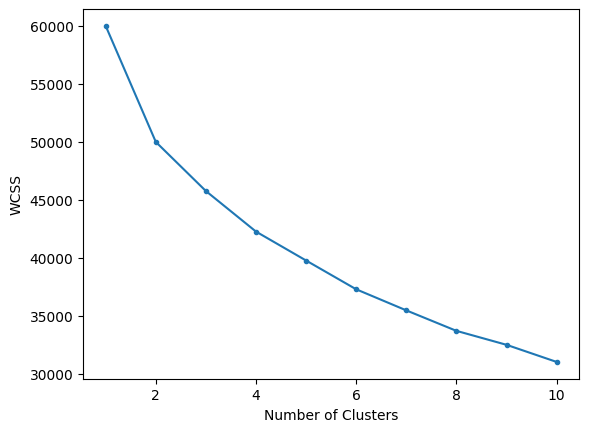

In [208]:
wcss = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=32)
  km.fit(dfs)
  wcss.append(km.inertia_)
plt.plot(range(1,11), wcss, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [209]:
findknee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  4


In [210]:
kmeans = KMeans(n_clusters = 4, random_state=1)
y_kmeans = kmeans.fit_predict(dfs)
y_kmeans

/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 2, ..., 2, 2, 1], dtype=int32)

In [212]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(dfs)
df['Cluster'] = labels
df.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results,Cluster
0,81,Female,O-,Diabetes,Aspirin,Inconclusive,0
1,35,Male,O+,Asthma,Lipitor,Normal,2
2,61,Male,B-,Obesity,Lipitor,Normal,2
3,49,Male,B-,Asthma,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Paracetamol,Normal,2


In [213]:
df.groupby('Cluster').agg(count = ('Cluster', 'count'),
                                    Age_mean = ('Age', 'mean'),
                                    Gender = ('Gender', pd.Series.mode),
                                    BloodType = ('Blood Type', pd.Series.mode),
                                    MedicalCondition = ('Medical Condition', pd.Series.mode),
                                    medication = ('Medication', pd.Series.mode),
                                    TestResults = ('Test Results', pd.Series.mode))

,count,Age_mean,Gender,BloodType,MedicalCondition,medication,TestResults
Cluster,,,,,,,
0,3109,62.518495,Female,A+,Cancer,Ibuprofen,Abnormal
1,2932,51.745225,Male,O-,Hypertension,Ibuprofen,Abnormal
2,1993,50.623181,Male,AB-,Cancer,Penicillin,Normal
3,1966,34.355544,Female,AB-,Arthritis,Penicillin,Inconclusive


In [214]:
x = new_df.drop('Test Results', axis=1).values
y = new_df['Test Results'].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

In [215]:
xgBoost = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42, objective='multi:softmax')
xgBoost.fit(xTrain, yTrain)
yPred = xgBoost.predict(xTest)
print('Accuracy score: ', accuracy_score(yTest, yPred))

Accuracy score:  0.3315
